OBS.:

passar p inteiro colunas qtd_fotos e tam_desc (done)

arredondar avaliacao (done)

normalizar dados

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data = pd.read_csv("dados_v1.csv")
data['qtd_fotos'] = data['qtd_fotos'].fillna(0).astype('int32')
data['tam_desc'] = data['tam_desc'].fillna(0).astype('int32')
data['avaliacao'] = data['avaliacao'].round(1)
data

,id_produto,regiao,frete,tempo_entrega,qtd_vendida,avaliacao,qtd_fotos,tam_desc,categoria
0,1e9e8ef04dbcff4541ed26657ea517e5,Sul,NaN,NaN,1,5.0,1,287,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,Sul,NaN,NaN,1,5.0,1,276,artes
2,96bd76ec8810374ed1b65e291975717f,Sul,NaN,NaN,1,5.0,1,250,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,Sul,NaN,NaN,1,1.0,1,261,bebes
4,9dc1a7de274444849c219cff195d0b71,Sul,NaN,NaN,1,5.0,4,402,utilidades_domesticas
...,...,...,...,...,...,...,...,...,...
164750,a0b7d5a992ccda646f2d34e418fff5a0,Centro-Oeste,NaN,NaN,33,3.2,2,67,moveis_decoracao
164751,bf4538d88321d0fd4412a93c974510e6,Centro-Oeste,NaN,NaN,2,4.5,1,971,construcao_ferramentas_iluminacao
164752,9a7c6041fa9592d9d9ef6cfe62a71f8c,Centro-Oeste,NaN,NaN,5,4.4,1,799,cama_mesa_banho
164753,83808703fc0706a22e264b9d75f04a2e,Centro-Oeste,NaN,NaN,7,5.0,2,156,informatica_acessorios


In [19]:
data.iloc[:,5:8] 

,avaliacao,qtd_fotos,tam_desc
0,5.0,1,287
1,5.0,1,276
2,5.0,1,250
3,1.0,1,261
4,5.0,4,402
...,...,...,...
164750,3.2,2,67
164751,4.5,1,971
164752,4.4,1,799
164753,5.0,2,156


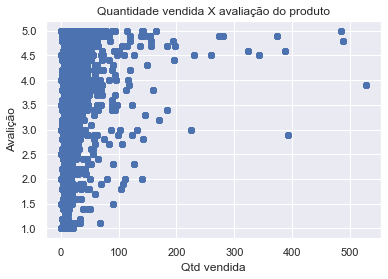

In [20]:
# Relação entre qnd vendida e avaliacao
plt.scatter(data['qtd_vendida'],data['avaliacao'])
plt.title('Quantidade vendida X avaliação do produto')
plt.xlabel('Qtd vendida')
plt.ylabel('Avalição')
plt.show()

In [21]:
df_products = pd.read_csv("Data\olist_products_dataset.csv")

total_pedidos = len(df_products)
data_products = data.iloc[:total_pedidos,4:8]
data_products # contem apenas dados referentes a produtos

,qtd_vendida,avaliacao,qtd_fotos,tam_desc
0,1,5.0,1,287
1,1,5.0,1,276
2,1,5.0,1,250
3,1,1.0,1,261
4,1,5.0,4,402
...,...,...,...,...
32946,33,3.2,2,67
32947,2,4.5,1,971
32948,5,4.4,1,799
32949,7,5.0,2,156


In [22]:
data_products_clusters = data_products.copy() # versao de data_products com os valores dos clusters

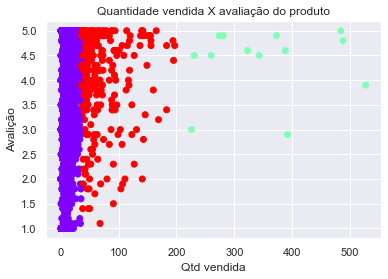

In [23]:
# cluster para quantidade vendida e avaliação do produto
x = data_products.iloc[:, :2]
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

data_products_clusters['Clusters_avaliacao'] = identified_clusters 
plt.scatter(data_products_clusters['qtd_vendida'],data_products_clusters['avaliacao'],c=data_products_clusters['Clusters_avaliacao'],cmap='rainbow')
plt.title('Quantidade vendida X avaliação do produto')
plt.xlabel('Qtd vendida')
plt.ylabel('Avalição')
plt.show()

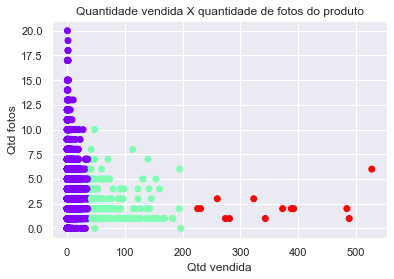

In [24]:
# cluster para quantidade vendida e quantidade de fotos
x = data_products.loc[:, ['qtd_vendida', 'qtd_fotos']]
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(x)
identified_clusters


data_products_clusters['Clusters_fotos'] = identified_clusters 
plt.scatter(data_products_clusters['qtd_vendida'],data_products_clusters['qtd_fotos'],c=data_products_clusters['Clusters_fotos'],cmap='rainbow')
plt.title('Quantidade vendida X quantidade de fotos do produto')
plt.xlabel('Qtd vendida')
plt.ylabel('Qtd fotos')
plt.show()

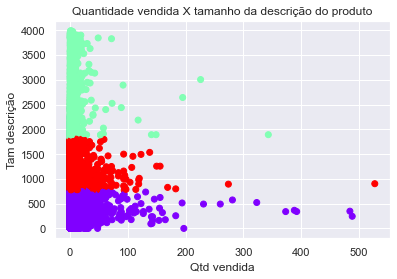

In [25]:
# cluster para quantidade vendida e tamanho da descrição
x = data_products.loc[:, ['qtd_vendida', 'tam_desc']]
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

data_products_clusters['Clusters_descricao'] = identified_clusters 
plt.scatter(data_products_clusters['qtd_vendida'],data_products_clusters['tam_desc'],c=data_products_clusters['Clusters_descricao'],cmap='rainbow')
plt.title('Quantidade vendida X tamanho da descrição do produto')
plt.xlabel('Qtd vendida')
plt.ylabel('Tam descrição')
plt.show()